## Lending Club Case Study

In [1]:
#import libraries
import pandas as pd

In [2]:
# read the dataset into a data frame

df = pd.read_csv('./loan.csv',parse_dates = ['next_pymnt_d'])

Get first look at the data

In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
df.shape

(39717, 111)

Get initial meta data for columns such as null and unique values

In [6]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [7]:
df.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
                              ...  
tax_liens                         1
tot_hi_cred_lim                   0
total_bal_ex_mort                 0
total_bc_limit                    0
total_il_high_credit_limit        0
Length: 111, dtype: int64

In [8]:
df.isna().sum().sort_values(ascending=False)

verification_status_joint    39717
annual_inc_joint             39717
mo_sin_old_rev_tl_op         39717
mo_sin_old_il_acct           39717
bc_util                      39717
                             ...  
delinq_amnt                      0
policy_code                      0
earliest_cr_line                 0
delinq_2yrs                      0
id                               0
Length: 111, dtype: int64

## DATA CLEANUP


# Fixing Rows
| Checklist Item      | Analysis |
| ----------- | ----------- |
| Delete incorrect rows      | No such rows found       |
| Delete summary rows   | No such rows found        |
| Delete extra rows   | No such rows found        |

After manual checking of csv, no such rows found

# Fixing Columns
| Checklist Item      | Analysis |
| ----------- | ----------- |
| Add column names if missing      | No such columns found       |
| Rename columns   | No such columns found        |
| Delete unnecessary columns   | Columns with all empty values found        |
| Split columns for more data   | URL and date columns can be split, desc column has a date if required        |
| Merge columns for identifiers   | No such columns found        |
| Align misaligned columns   | No such columns found        |

In [9]:
# dropping columns which have no data
df.dropna(axis=1,how='all',inplace=True)
df.isna().sum().sort_values(ascending=False)

next_pymnt_d                  38577
mths_since_last_record        36931
mths_since_last_delinq        25682
desc                          12940
emp_title                      2459
emp_length                     1075
pub_rec_bankruptcies            697
last_pymnt_d                     71
chargeoff_within_12_mths         56
collections_12_mths_ex_med       56
revol_util                       50
tax_liens                        39
title                            11
last_credit_pull_d                2
home_ownership                    0
int_rate                          0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee           0
term                              0
last_pymnt_amnt                   0
initial_list_status               0
funded_amnt_inv             

# Fix Missing Values
| Checklist Item      | Analysis |
| ----------- | ----------- |
| Set values as missing values      | No such values found       |
| Delete rows, columns with significant missing values   | Two columns with more than 85% missing values identified       |
| Fill partial missing values using business judgement   | No such opportunity identified      |

In [10]:
# dropping columns with more than 85% missing values
df.drop(['next_pymnt_d','mths_since_last_record'], axis=1, inplace=True)
df.isna().sum().sort_values(ascending=False)

mths_since_last_delinq        25682
desc                          12940
emp_title                      2459
emp_length                     1075
pub_rec_bankruptcies            697
last_pymnt_d                     71
chargeoff_within_12_mths         56
collections_12_mths_ex_med       56
revol_util                       50
tax_liens                        39
title                            11
last_credit_pull_d                2
out_prncp                         0
initial_list_status               0
out_prncp_inv                     0
total_pymnt                       0
total_acc                         0
total_pymnt_inv                   0
recoveries                        0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
pub_rec                           0
collection_recovery_fee           0
last_pymnt_amnt                   0
policy_code                       0
application_type                  0
acc_now_delinq              

# Standardising Values
| Checklist Item      | Analysis |
| ----------- | ----------- |
| Standardise units      |  Unit symbols - (months, %) can be removed   |
| Scale values if required   |   All units have proper scale     |
| Standardise precision   | Decimal precision can be brought to two decimal places     |
| Remove outliers   |      |

In [11]:
# remove unit symbols
df['term'] = df['term'].apply(lambda x: int(x.replace('months','').replace(' ','')))
df['int_rate'] = df['int_rate'].apply(lambda x: float(x.replace('%','')))
df['revol_util'] = df['revol_util'].apply(lambda x: float(str(x).replace('%','')))

In [12]:
# standardise decimal places
df.round({'funded_amnt_inv': 2, 'total_pymnt':2, 'total_rec_late_fee':2, 'total_pymnt_inv':2})

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36,8.07,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36,10.28,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36,8.07,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36,7.43,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


# Invalid Values
| Checklist Item      | Analysis |
| ----------- | ----------- |
| Encode unicode properly     |  All values are encoded correctly   |
| Convert incorrect data types   |    Data types have been fixed for int_rate, revol_util, term   |
| Correct values that go beyond range   | No such values found     |
| Correct values not in the list   |    No such values found  |
| Correct wrong structure   |  No such values found    |
| Validate internal rules   |  No such rules provided    |

# Filtering Data
| Checklist Item      | Analysis |
| ----------- | ----------- |
| Deduplicate data     |  No such rows found   |
| Filter rows   |  Only "Charged Off" loans are required for analysis     |
| Filter columns   | loan_amnt,  term, int_rate, grade, sub_grade,  annual_inc, purpose, dti, emp_length, issue_d, home_ownership,  verification_status |

In [13]:
# checking for duplicate rows
df[df.duplicated()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


In [20]:
# filtering bad loans
charged_off_loans_df = df[(df["loan_status"] == "Charged Off")]
charged_off_loans_df["loan_status"].value_counts()

Charged Off    5627
Name: loan_status, dtype: int64

# Univariate Analysis

Analyzing each variable independently to reveal insights.

In [22]:
# importing libraries for visualizations
import seaborn as sns
import matplotlib.pyplot as plt

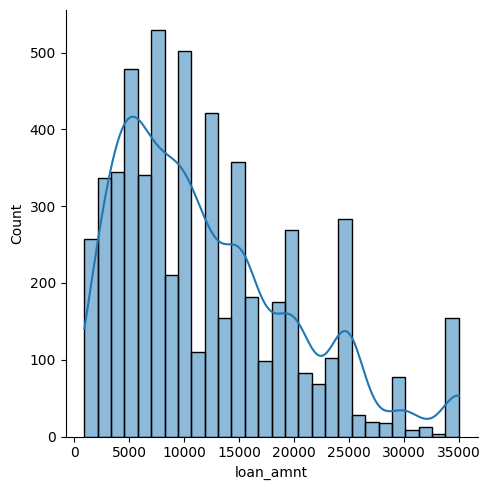

In [25]:
# loan amount
sns.displot(data=charged_off_loans_df, x="loan_amnt", kde=True)

In [26]:
charged_off_loans_df["loan_amnt"].describe()

count     5627.000000
mean     12104.385108
std       8085.732038
min        900.000000
25%       5600.000000
50%      10000.000000
75%      16500.000000
max      35000.000000
Name: loan_amnt, dtype: float64

<AxesSubplot: xlabel='loan_amnt'>

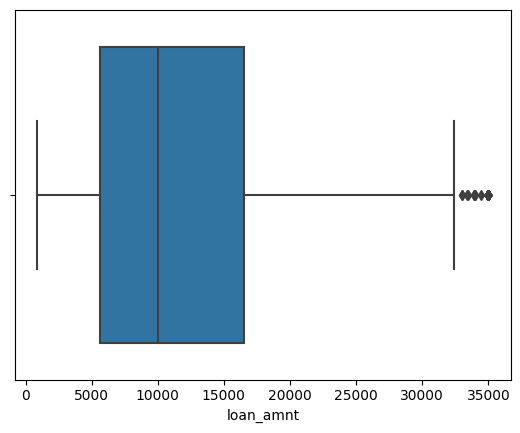

In [37]:
sns.boxplot(x=charged_off_loans_df['loan_amnt'])

In [43]:
charged_off_loans_df[(charged_off_loans_df['loan_amnt']>=35000)]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
496,1063393,1295948,35000,23250,23225.00000,60,20.30,619.88,E,E5,...,619.88,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
765,1053763,1285365,35000,21350,21325.00000,60,20.89,576.27,F,F1,...,576.27,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
836,1059319,1291122,35000,22875,22875.00000,60,19.03,593.77,E,E2,...,31.28,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
887,1058824,1290419,35000,35000,35000.00000,60,20.89,944.71,F,F1,...,944.71,Dec-15,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1096,1056234,1287815,35000,23350,23350.00000,60,11.71,516.00,B,B3,...,516.00,Dec-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19027,683184,872476,35000,35000,12793.19224,60,16.02,851.51,D,D5,...,3000.00,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
19142,679239,867705,35000,35000,21068.32935,60,16.77,865.52,E,E2,...,32.06,Feb-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
19238,679046,867473,35000,35000,34993.26306,60,16.40,858.59,E,E1,...,200.33,Sep-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
19430,674982,862684,35000,35000,34969.06266,60,21.22,951.21,G,G4,...,952.25,Oct-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


## loan amount insights
- amounts range from 900 to 35000
- most asked loans are around 12000

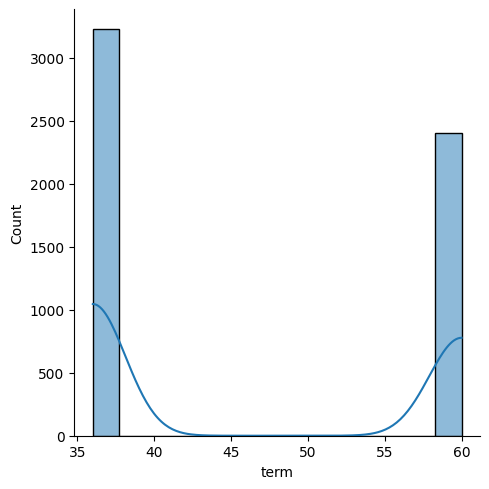

In [27]:
# term
sns.displot(data=charged_off_loans_df, x="term", kde=True)

In [29]:
charged_off_loans_df["term"].value_counts()

36    3227
60    2400
Name: term, dtype: int64

<AxesSubplot: xlabel='term'>

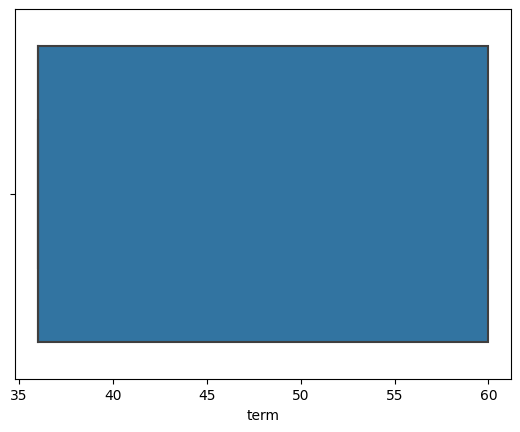

In [44]:
sns.boxplot(x=charged_off_loans_df['term'])

## term insights
- among the charged off loans, only two term durations were applied for
  - 3 years
  - 5 years

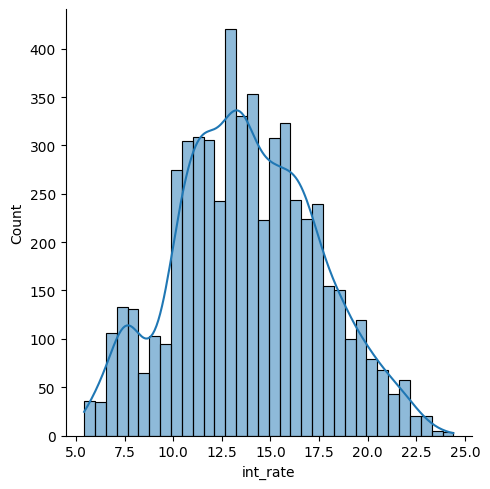

In [30]:
# int_rate
sns.displot(data=charged_off_loans_df, x="int_rate", kde=True)

In [31]:
charged_off_loans_df["int_rate"].describe()

count    5627.000000
mean       13.820432
std         3.654413
min         5.420000
25%        11.310000
50%        13.610000
75%        16.400000
max        24.400000
Name: int_rate, dtype: float64

<AxesSubplot: xlabel='int_rate'>

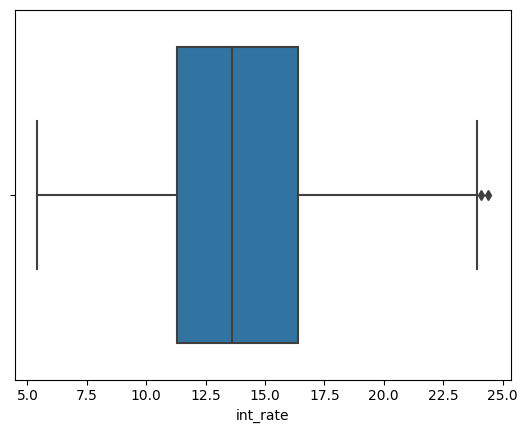

In [45]:
sns.boxplot(x=charged_off_loans_df['int_rate'])

## interest rate insights
- interest rates start from 5.4% and go all the way up to 24%
- most loans have an interest rate of around 10 to 15%

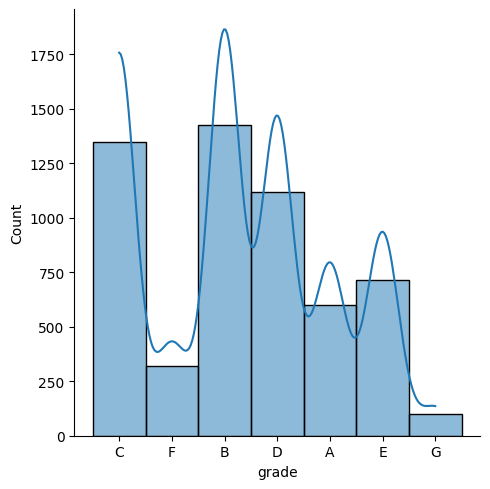

In [34]:
# grade
sns.displot(data=charged_off_loans_df, x="grade", kde=True)

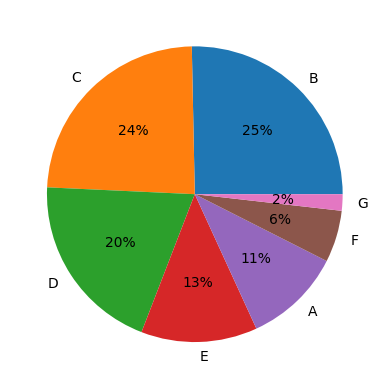

In [52]:
grades = charged_off_loans_df['grade'].value_counts()
plt.pie(grades,labels=grades.index,autopct="%.0f%%");


## grade insights
- majority of loans fall under B, C, D grades
- very few loans fall under G, F grades

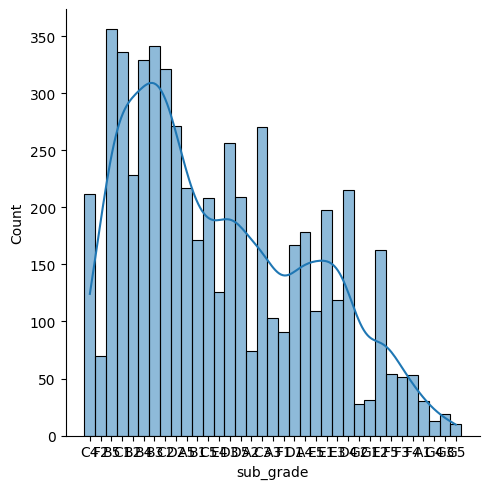

In [53]:
# sub grade
sns.displot(data=charged_off_loans_df, x="sub_grade", kde=True)

In [54]:
charged_off_loans_df['sub_grade'].value_counts()

B5    356
B3    341
C1    336
B4    329
C2    321
D2    271
C3    270
D3    256
B2    228
A5    217
D4    215
C4    212
D5    209
C5    208
E1    198
A4    178
B1    171
D1    167
E2    163
E4    126
E3    119
E5    109
A3    103
F1     91
A2     74
F2     70
F5     54
F4     53
F3     51
G1     31
A1     30
G2     28
G3     19
G4     13
G5     10
Name: sub_grade, dtype: int64

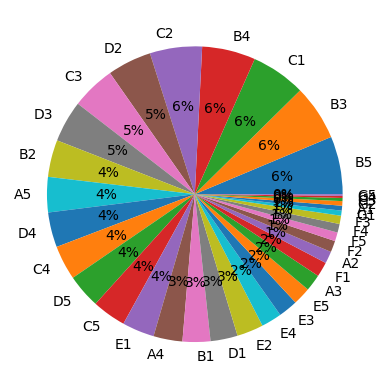

In [55]:
sub_grades = charged_off_loans_df['sub_grade'].value_counts()
plt.pie(sub_grades,labels=sub_grades.index,autopct="%.0f%%");

## sub-grade insights
- loans seem to have an equal distribution among the sub grades 

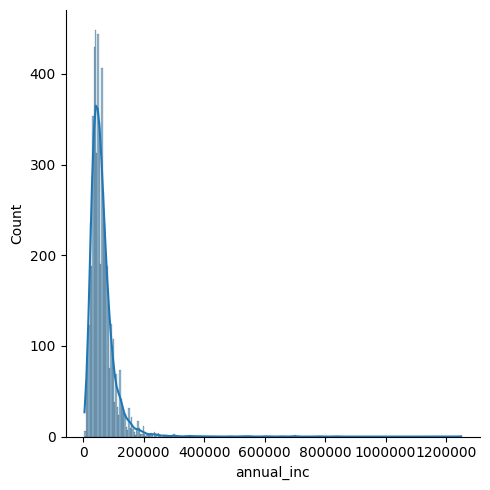

In [73]:
# annual income
sns.displot(data=charged_off_loans_df, x="annual_inc", kde=True)
plt.ticklabel_format(style='plain', axis='x') # this suppresses the scientific notation issue


In [68]:
charged_off_loans_df['annual_inc'].value_counts().sort_values(ascending=False)

60000.0     256
50000.0     164
40000.0     156
30000.0     139
36000.0     131
           ... 
54912.0       1
68496.0       1
700000.0      1
39100.0       1
33990.0       1
Name: annual_inc, Length: 1253, dtype: int64

In [69]:
charged_off_loans_df['annual_inc'].sort_values(ascending=False)

10621    1250000.00
30011     840000.00
25643     780000.00
26675     700053.85
34699     700000.00
            ...    
36687       8000.00
29517       6000.00
34116       6000.00
34268       4800.00
29283       4080.00
Name: annual_inc, Length: 5627, dtype: float64

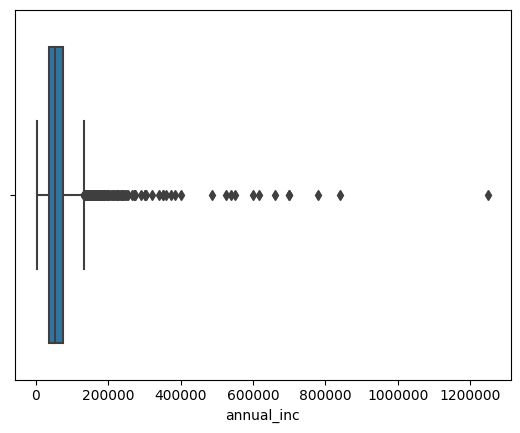

In [72]:
sns.boxplot(x=charged_off_loans_df['annual_inc'])
plt.ticklabel_format(style='plain', axis='x')


In [77]:
(charged_off_loans_df['annual_inc'] > 200000).sum()

60

In [79]:
charged_off_loans_df['annual_inc'].describe().apply(lambda x: format(x, 'f'))

count       5627.000000
mean       62427.298034
std        47776.014188
min         4080.000000
25%        37000.000000
50%        53000.000000
75%        75000.000000
max      1250000.000000
Name: annual_inc, dtype: object

In [89]:
# finding outliers
Q1 = charged_off_loans_df['annual_inc'].quantile(0.25)
Q3 = charged_off_loans_df['annual_inc'].quantile(0.75)
IQR = Q3 - Q1

outliers = charged_off_loans_df[((charged_off_loans_df['annual_inc'] < (Q1 - 1.5 * IQR)) |(charged_off_loans_df['annual_inc'] > (Q3 + 1.5 * IQR)))]
outliers['annual_inc'].sort_values()


6944      132600.00
7826      132725.38
20380     132996.00
7530      133000.00
32187     133000.00
            ...    
34699     700000.00
26675     700053.85
25643     780000.00
30011     840000.00
10621    1250000.00
Name: annual_inc, Length: 260, dtype: float64

In [91]:
outliers['annual_inc'].describe().apply(lambda x: format(x, 'f'))

count        260.000000
mean      201771.274269
std       125124.358357
min       132600.000000
25%       146556.250000
50%       160000.000000
75%       200000.000000
max      1250000.000000
Name: annual_inc, dtype: object

In [92]:
# removing outliers
charged_off_loans_df = charged_off_loans_df[~((charged_off_loans_df['annual_inc'] < (Q1 - 1.5 * IQR)) |(charged_off_loans_df['annual_inc'] > (Q3 + 1.5 * IQR)))]

In [93]:
charged_off_loans_df['annual_inc'].describe().apply(lambda x: format(x, 'f'))

count      5367.000000
mean      55676.891137
std       25516.521797
min        4080.000000
25%       36000.000000
50%       51200.000000
75%       70000.000000
max      132000.000000
Name: annual_inc, dtype: object

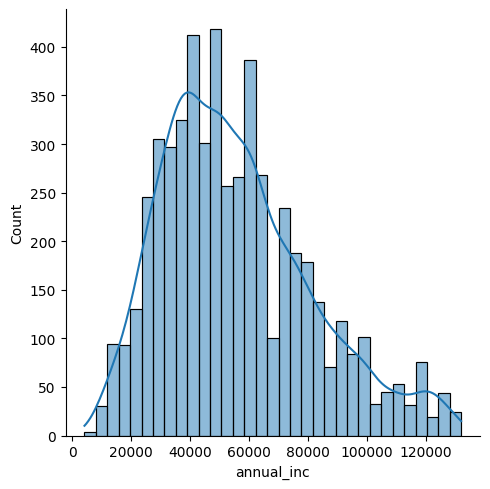

In [94]:
sns.displot(data=charged_off_loans_df, x="annual_inc", kde=True)
plt.ticklabel_format(style='plain', axis='x') # this suppresses the scientific notation issue

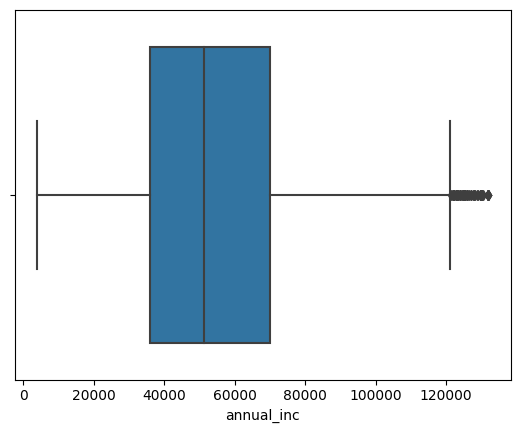

In [95]:
sns.boxplot(x=charged_off_loans_df['annual_inc'])
plt.ticklabel_format(style='plain', axis='x')

## annual income insights
- outliers were detected above the 120000 income level and were removed
- majority of income distribution is around 30000 to 60000

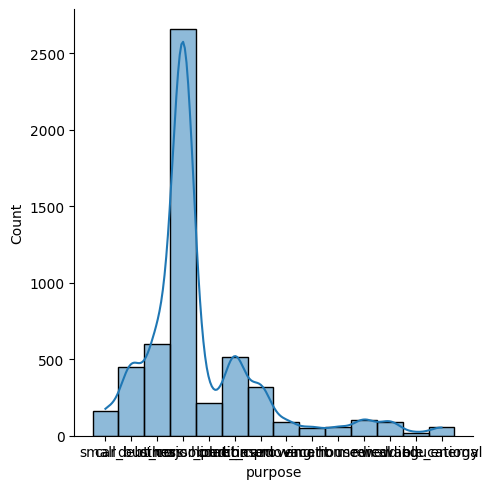

In [96]:
# purpose
sns.displot(data=charged_off_loans_df, x="purpose", kde=True)

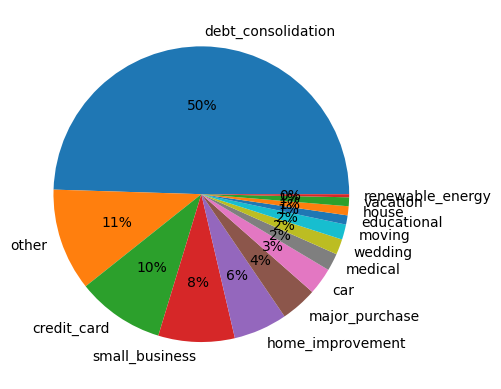

In [97]:
purpose = charged_off_loans_df['purpose'].value_counts()
plt.pie(purpose,labels=purpose.index,autopct="%.0f%%");

In [98]:
charged_off_loans_df['purpose'].value_counts()

debt_consolidation    2657
other                  601
credit_card            515
small_business         448
home_improvement       315
major_purchase         214
car                    158
medical                102
wedding                 91
moving                  89
educational             54
house                   53
vacation                52
renewable_energy        18
Name: purpose, dtype: int64

## purpose insights
- half of the loan applications were for debt consolidation, meaning people were asking for loan to clear other loans
- amongst the other half
  - credit card debt, small businesses and 'other' purposes were significant

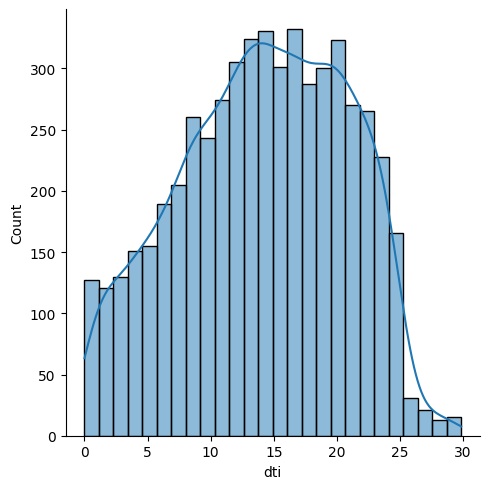

In [99]:
# debt to income ratio
sns.displot(data=charged_off_loans_df, x="dti", kde=True)

<AxesSubplot: xlabel='dti'>

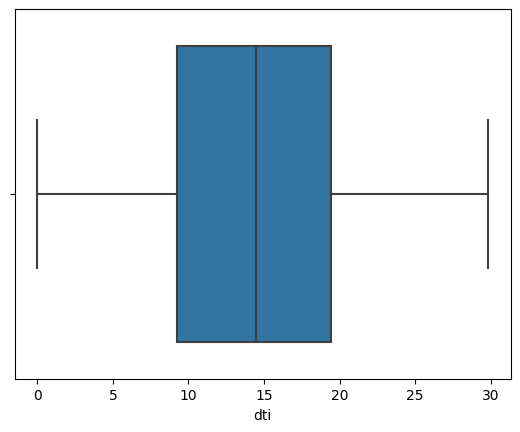

In [100]:
sns.boxplot(x=charged_off_loans_df['dti'])

In [103]:
charged_off_loans_df['dti'].sort_values(ascending=False)

137      29.85
17993    29.62
17542    29.60
11951    29.58
17973    29.45
         ...  
22128     0.00
33164     0.00
12042     0.00
12377     0.00
29735     0.00
Name: dti, Length: 5367, dtype: float64

## debt to income ratio insights
- amongst the charged off loans, dti was distributed mostly between 7.5 to 25%

According to [Wikipedia](https://www.investopedia.com/terms/d/dti.asp)
- A DTI of 43% is typically the highest ratio a borrower can have and still get qualified for a mortgage, but lenders generally seek ratios of no more than 36%.
- This shows that, while applying for the loans their dti were up to the standard.

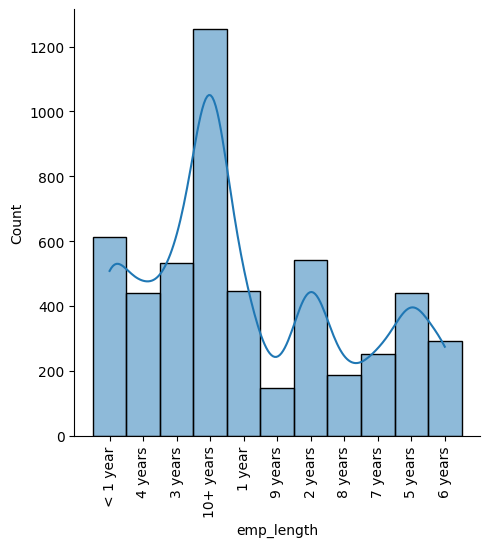

In [106]:
# employment length
sns.displot(data=charged_off_loans_df, x="emp_length", kde=True).set_xticklabels(rotation=90)

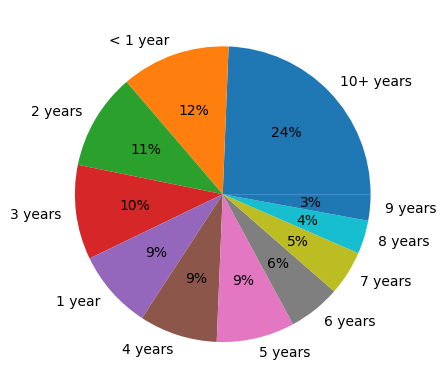

In [107]:
emp_length = charged_off_loans_df['emp_length'].value_counts()
plt.pie(emp_length,labels=emp_length.index,autopct="%.0f%%");

## employment length insights
- amongst the charged off loans, about a quarter of loans had applicants with employment of more than 10 years
- more than half of the applications had employment of more than 5 years
- about 30% of applications had employment of 3 years or less.

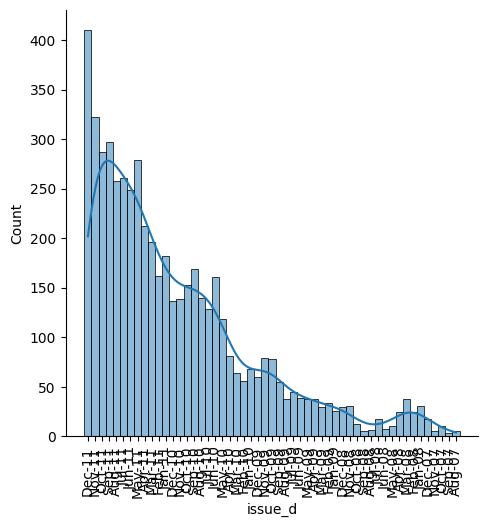

In [108]:
# issue date
sns.displot(data=charged_off_loans_df, x="issue_d", kde=True).set_xticklabels(rotation=90)

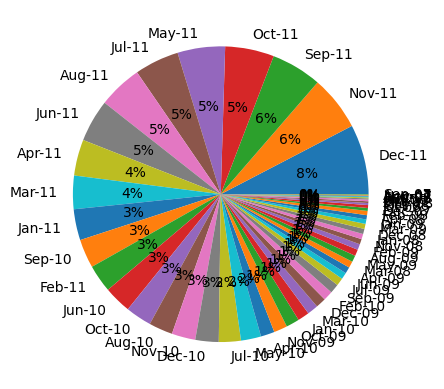

In [109]:
issue_d = charged_off_loans_df['issue_d'].value_counts()
plt.pie(issue_d,labels=issue_d.index,autopct="%.0f%%");

## issue date insights
- almost evenly distributed

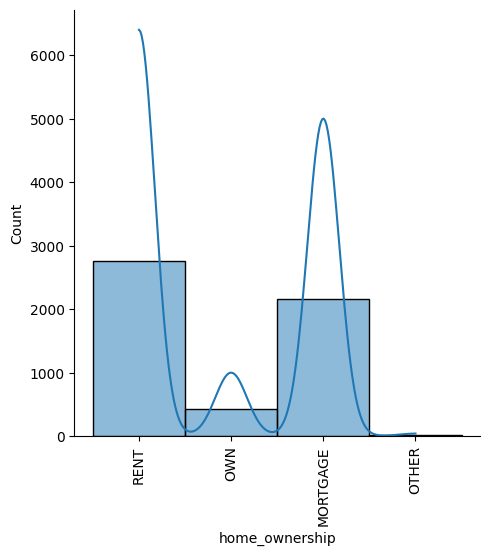

In [110]:
# home ownership
sns.displot(data=charged_off_loans_df, x="home_ownership", kde=True).set_xticklabels(rotation=90)

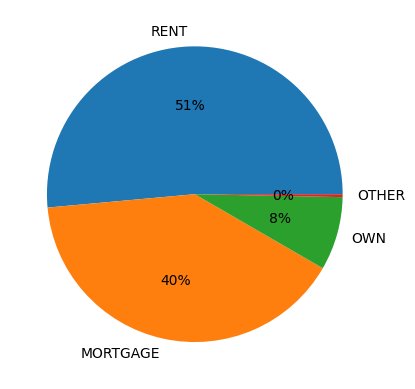

In [111]:
home_ownership = charged_off_loans_df['home_ownership'].value_counts()
plt.pie(home_ownership,labels=home_ownership.index,autopct="%.0f%%");

## home ownership insights
- more than 90% of charged off loan applicants don't own a home
- they are either living on rent or have an running mortgage

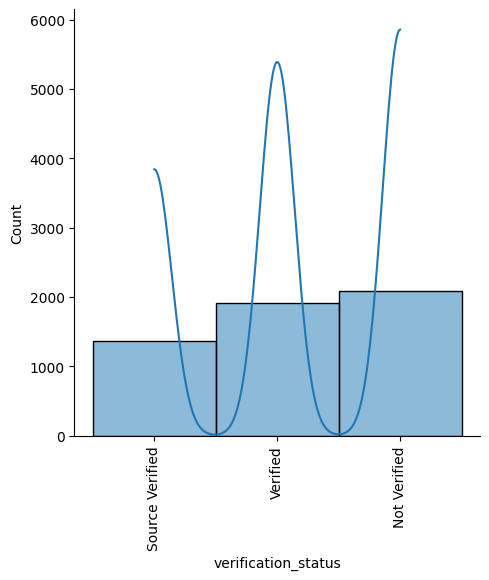

In [112]:
# verification status
sns.displot(data=charged_off_loans_df, x="verification_status", kde=True).set_xticklabels(rotation=90)

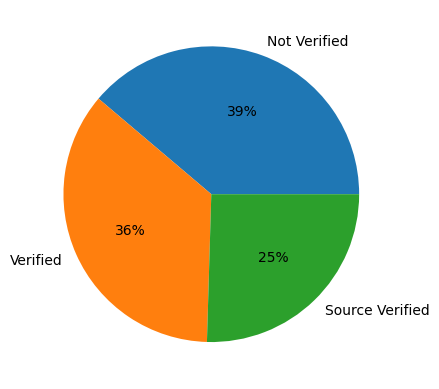

In [113]:
verification_status = charged_off_loans_df['verification_status'].value_counts()
plt.pie(verification_status,labels=verification_status.index,autopct="%.0f%%");

## verification status insights
- more than 60% of charged off loans had their income verified
- quarter of the applications had their income verified directly by the lending club

# Segmented Univariate Analysis

In [116]:
# by grade
charged_off_loans_df.groupby(by='grade').mean()

/var/folders/t_/lz6pz6gj6gng1mkk0pxszwkh0000gr/T/ipykernel_7906/4027623955.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  charged_off_loans_df.groupby(by='grade').mean()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
grade,,,,,,,,,,,,,,,,,,,,,
A,723049.812606,897330.218058,7709.369676,7530.664395,7244.378097,37.512777,7.583850,228.432198,49729.619029,13.464702,...,322.885457,45.887959,236.200698,0.0,1.0,0.0,0.0,0.0,0.015491,0.0
B,693349.296784,862323.042398,10649.195906,10337.225877,9542.383754,43.438596,11.121404,293.788692,53293.760292,13.943385,...,464.392165,51.029807,312.588787,0.0,1.0,0.0,0.0,0.0,0.052946,0.0
C,673732.921554,835722.219345,10912.185834,10630.083778,9624.234696,44.956588,13.606329,305.242841,54469.257403,14.517007,...,599.257026,90.450328,301.857304,0.0,1.0,0.0,0.0,0.0,0.078906,0.0
D,690203.724719,858204.558989,11998.642322,11724.414794,10733.887247,47.617978,15.846433,338.671826,56653.859232,14.068249,...,635.233654,80.576731,316.100281,0.0,1.0,0.0,0.0,0.0,0.081159,0.0
E,726812.540000,907362.426154,15287.423077,14771.692308,13855.842435,54.276923,17.849954,405.086031,60214.242508,14.463354,...,890.645135,99.495750,362.369031,0.0,1.0,0.0,0.0,0.0,0.091900,0.0
F,753281.850174,940041.236934,18438.153310,17725.522648,16858.086411,56.153310,20.001359,497.084634,66823.022265,14.235749,...,1413.264630,159.261009,436.444460,0.0,1.0,0.0,0.0,0.0,0.098940,0.0
G,720648.010638,901202.787234,18095.212766,17816.489362,16235.751795,55.148936,21.449681,520.345426,67859.602447,13.487128,...,1220.897021,165.805599,548.340106,0.0,1.0,0.0,0.0,0.0,0.127660,0.0


## grade insights
this is an ordered categorical

- as grade increases, average loan amount is increasing 
- as grade increases, average funded amount are increasing
- as grade increases, average term is increasing
- as grade increases, average interest rate is increasing
- as grade increases, average annual income is increasing
- as grade increases, dti is not varying much

In [119]:
# by purpose
charged_off_loans_df.groupby(by='purpose').mean()

/var/folders/t_/lz6pz6gj6gng1mkk0pxszwkh0000gr/T/ipykernel_7906/3054764978.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  charged_off_loans_df.groupby(by='purpose').mean()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
purpose,,,,,,,,,,,,,,,,,,,,,
car,691364.993671,861657.835443,7239.082278,7176.740506,6838.133014,47.696203,12.321962,199.150380,53396.227342,11.840443,...,403.075085,48.461384,201.830759,0.0,1.0,0.0,0.0,0.0,0.070968,0.0
credit_card,720838.112621,893020.510680,12656.504854,12220.582524,11417.989628,45.926214,13.336369,350.053845,57947.728078,15.613146,...,662.104703,96.631350,353.460097,0.0,1.0,0.0,0.0,0.0,0.084479,0.0
debt_consolidation,717749.156191,892984.333082,13227.587505,12845.587128,12032.621133,47.254799,14.219307,363.446240,56265.719891,15.254170,...,739.998545,88.003633,346.438265,0.0,1.0,0.0,0.0,0.0,0.076717,0.0
educational,425921.537037,505825.870370,7761.111111,7397.685185,6386.959156,39.111111,12.772407,239.405741,45571.500000,11.199444,...,398.197067,102.132878,416.280926,0.0,1.0,0.0,0.0,0.0,0.039216,0.0
home_improvement,678514.565079,845330.517460,11143.253968,10943.650794,9746.227085,45.447619,13.096794,311.878952,61646.169905,12.348159,...,434.114667,50.965375,280.096952,0.0,1.0,0.0,0.0,0.0,0.061688,0.0
house,657474.886792,818037.377358,11358.018868,11228.301887,10537.188675,47.773585,14.975849,319.642830,59431.842264,11.712264,...,626.080566,22.554319,385.929245,0.0,1.0,0.0,0.0,0.0,0.115385,0.0
major_purchase,643563.682243,808168.336449,8876.401869,8617.640187,7783.741284,45.196262,12.824486,247.975514,47986.256822,11.623364,...,486.262935,65.969346,248.806729,0.0,1.0,0.0,0.0,0.0,0.038095,0.0
medical,697452.901961,867564.372549,8419.117647,8419.117647,7924.997532,43.764706,13.253824,240.155098,53630.431373,12.153824,...,371.663922,45.950639,217.217451,0.0,1.0,0.0,0.0,0.0,0.069307,0.0
moving,716279.202247,896373.539326,5608.146067,5507.303371,5240.768983,40.853933,12.275281,164.207753,44005.685393,12.510449,...,223.551685,29.387867,172.975393,0.0,1.0,0.0,0.0,0.0,0.058140,0.0


## purpose insights
this is an unordered categorical

- maximum loan amounts were asked for debt consolidation and for small businesses
- minimum loan amounts were asked for moving and vacations

In [120]:
# by employment length
charged_off_loans_df.groupby(by='emp_length').mean()

/var/folders/t_/lz6pz6gj6gng1mkk0pxszwkh0000gr/T/ipykernel_7906/791250711.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  charged_off_loans_df.groupby(by='emp_length').mean()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
emp_length,,,,,,,,,,,,,,,,,,,,,
1 year,662446.608989,816577.022472,10458.483146,10010.224719,8653.708209,44.035955,13.620944,297.707326,51333.286022,13.960157,...,499.657765,80.294313,311.950135,0.0,1.0,0.0,0.0,0.0,0.034722,0.0
10+ years,727210.358340,905196.629689,14257.920990,13868.415802,12937.814911,48.641660,14.006488,383.881149,64140.851907,14.539026,...,811.612726,90.623323,365.965650,0.0,1.0,0.0,0.0,0.0,0.090538,0.0
2 years,667607.337638,829858.891144,10391.236162,10106.180812,9306.747480,44.811808,13.777085,296.924779,49672.673653,13.717657,...,563.721009,75.464422,298.320812,0.0,1.0,0.0,0.0,0.0,0.045198,0.0
3 years,690483.110902,862569.242481,11113.815789,10764.755639,10134.631347,45.654135,13.900526,310.426353,54079.972594,13.937575,...,518.710013,73.389826,285.160677,0.0,1.0,0.0,0.0,0.0,0.077947,0.0
4 years,683227.407745,850110.257403,11128.359909,10940.660592,10111.458417,45.457859,13.845444,318.030068,55506.934692,13.601617,...,579.599248,60.580948,316.087198,0.0,1.0,0.0,0.0,0.0,0.056075,0.0
5 years,722786.583144,901258.369021,11855.466970,11612.357631,10975.585829,46.933941,13.789795,329.643030,57995.082187,14.398679,...,624.744237,68.434169,295.979499,0.0,1.0,0.0,0.0,0.0,0.071264,0.0
6 years,747751.075085,929544.081911,12363.225256,12010.238908,11041.232482,47.221843,13.938942,338.710546,59046.284642,14.416894,...,740.002355,75.324337,321.888362,0.0,1.0,0.0,0.0,0.0,0.048611,0.0
7 years,697960.207171,868682.434263,12324.203187,12011.553785,11370.063302,47.282869,13.965857,338.371355,56985.477610,14.962112,...,558.682004,77.285656,299.865339,0.0,1.0,0.0,0.0,0.0,0.069106,0.0
8 years,707678.515957,876564.787234,12807.047872,12396.010638,11475.379605,46.595745,13.684096,351.902447,60077.322128,14.991489,...,721.879787,97.543035,367.742979,0.0,1.0,0.0,0.0,0.0,0.075676,0.0


## employment length insights
this is an ordered categorical

- as employment length increases, average annual income is increasing
- as employment length increases, requested loan amount is increasing
- as employment length increases, interest rate remained around 13-14%
- as employment length increases, average loan term remained around 45 years
- as employment length increases, dti varied between 13-14%

In [121]:
# by home ownership
charged_off_loans_df.groupby(by='home_ownership').mean()

/var/folders/t_/lz6pz6gj6gng1mkk0pxszwkh0000gr/T/ipykernel_7906/699552585.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  charged_off_loans_df.groupby(by='home_ownership').mean()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
home_ownership,,,,,,,,,,,,,,,,,,,,,
MORTGAGE,701724.823448,873613.462929,13661.167748,13193.095459,12174.817225,47.833179,13.682456,367.684055,65457.953818,14.414411,...,763.707356,90.628312,358.131807,0.0,1.0,0.0,0.0,0.0,0.083137,0.0
OTHER,390512.941176,432311.941176,13379.411765,12933.823529,8954.719772,37.411765,13.285882,431.654706,55870.294118,13.511765,...,440.243440,83.502612,397.503529,0.0,1.0,0.0,0.0,0.0,0.117647,0.0
OWN,701002.679814,873987.552204,10885.382831,10646.577726,9904.471025,46.412993,13.686079,303.428933,49099.141578,13.966589,...,635.581597,89.017037,336.665708,0.0,1.0,0.0,0.0,0.0,0.069048,0.0
RENT,698279.207896,867530.310033,10418.480623,10186.571894,9447.033280,44.927200,13.822068,297.639073,49057.618750,13.930851,...,528.745595,69.600263,285.345704,0.0,1.0,0.0,0.0,0.0,0.058105,0.0


## home ownership insights
this is an unordered categorical
- Mortgage applicants have higher average annual income
- Mortgage applicants are also the ones asking for higher loans with higher loan terms

In [122]:
# by verification status
charged_off_loans_df.groupby(by='verification_status').mean()

/var/folders/t_/lz6pz6gj6gng1mkk0pxszwkh0000gr/T/ipykernel_7906/1405294526.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  charged_off_loans_df.groupby(by='verification_status').mean()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
verification_status,,,,,,,,,,,,,,,,,,,,,
Not Verified,623237.124820,770179.159866,8505.196831,8349.735958,7189.293805,41.565050,12.671282,256.397364,50855.808632,13.910917,...,426.831458,73.125141,261.868454,0.0,1.0,0.0,0.0,0.0,0.070487,0.0
Source Verified,762070.318947,953934.847842,10277.542063,10021.580102,9690.657315,47.885881,14.035106,280.700278,53642.556320,13.045640,...,475.540958,47.763759,286.932436,0.0,1.0,0.0,0.0,0.0,0.075347,0.0
Verified,736092.269171,916137.115284,16379.525300,15812.402191,14895.745519,50.009390,14.728096,435.872029,62366.119384,15.132420,...,965.160382,109.502026,404.193938,0.0,1.0,0.0,0.0,0.0,0.063641,0.0


## verification status insights
this is an unordered categorical

- verified applicants received close to the amount requested
- surprisingly, unverified income source applicants got loans at a lower interest rate

# Bivariate analysis

In [124]:
# correlation matrix
charged_off_loans_df.corr()

/var/folders/t_/lz6pz6gj6gng1mkk0pxszwkh0000gr/T/ipykernel_7906/2841289618.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  charged_off_loans_df.corr()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
id,1.000000,0.994164,0.155050,0.168976,0.311964,0.279605,0.189846,0.087747,0.024510,0.108036,...,0.072624,-0.043292,0.027857,NaN,NaN,NaN,NaN,NaN,-0.023983,NaN
member_id,0.994164,1.000000,0.150514,0.163868,0.320571,0.302465,0.191255,0.076606,0.020654,0.108121,...,0.069233,-0.047522,0.024289,NaN,NaN,NaN,NaN,NaN,-0.020432,NaN
loan_amnt,0.155050,0.150514,1.000000,0.980176,0.907138,0.393447,0.337859,0.926707,0.467526,0.080620,...,0.300394,0.145644,0.325938,NaN,NaN,NaN,NaN,NaN,-0.019125,NaN
funded_amnt,0.168976,0.163868,0.980176,1.000000,0.925860,0.377399,0.341464,0.953590,0.461374,0.076217,...,0.308433,0.152406,0.330422,NaN,NaN,NaN,NaN,NaN,-0.024368,NaN
funded_amnt_inv,0.311964,0.320571,0.907138,0.925860,1.000000,0.425883,0.358291,0.856747,0.418209,0.088820,...,0.294017,0.126868,0.285403,NaN,NaN,NaN,NaN,NaN,-0.028082,NaN
term,0.279605,0.302465,0.393447,0.377399,0.425883,1.000000,0.454753,0.138561,0.134401,0.065254,...,0.132912,0.009483,0.051119,NaN,NaN,NaN,NaN,NaN,0.021302,NaN
int_rate,0.189846,0.191255,0.337859,0.341464,0.358291,0.454753,1.000000,0.315336,0.156569,0.043029,...,0.158188,0.069847,0.085645,NaN,NaN,NaN,NaN,NaN,0.080720,NaN
installment,0.087747,0.076606,0.926707,0.953590,0.856747,0.138561,0.315336,1.000000,0.462703,0.058325,...,0.291623,0.169298,0.339749,NaN,NaN,NaN,NaN,NaN,-0.016810,NaN
annual_inc,0.024510,0.020654,0.467526,0.461374,0.418209,0.134401,0.156569,0.462703,1.000000,-0.019518,...,0.172490,0.079218,0.181743,NaN,NaN,NaN,NaN,NaN,0.037635,NaN
dti,0.108036,0.108121,0.080620,0.076217,0.088820,0.065254,0.043029,0.058325,-0.019518,1.000000,...,0.042428,0.016559,0.004276,NaN,NaN,NaN,NaN,NaN,0.017408,NaN


/var/folders/t_/lz6pz6gj6gng1mkk0pxszwkh0000gr/T/ipykernel_7906/2395741505.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(charged_off_loans_df.corr(), annot=True, fmt="g", cmap='viridis')


<AxesSubplot: >

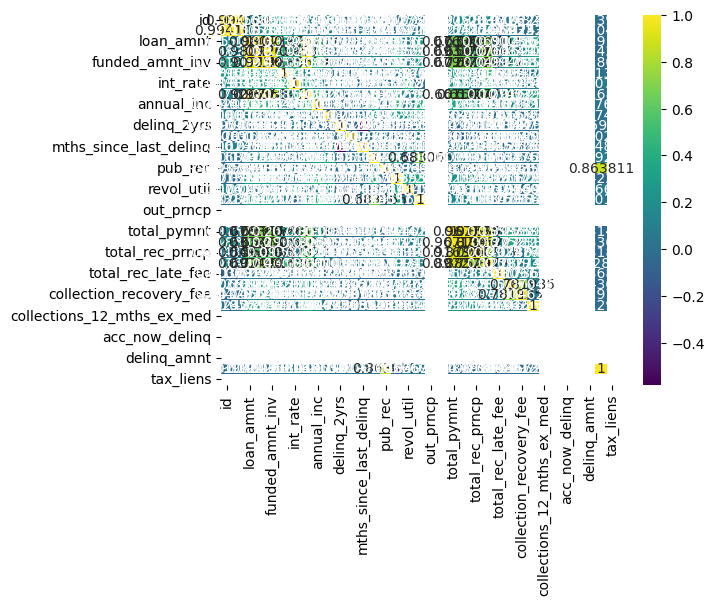

In [125]:
sns.heatmap(charged_off_loans_df.corr(), annot=True, fmt="g", cmap='viridis')